# Dataset 1 - Top title (videos) searched on Youtube 

In [1]:
# pip install wordcloud

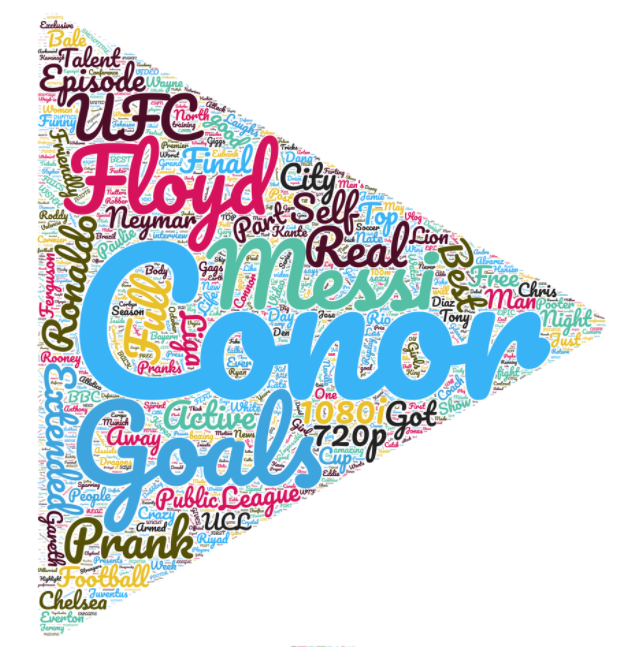

In [2]:
from IPython.display import Image
Image(filename='title.png') 

## Where did the data come from? 
### The data is from reddit.com. Source: https://www.reddit.com/r/dataisbeautiful/comments/7nbqet/1_year_of_youtube_titles_word_cloud_oc/

## Is the data quantitative, qualitative, categorical, etc? 
### The data is quantitative as it stores the count of each title searched on youtube (i.e. a numerical value)

## How was the data processed before being displayed? 
### The data was processed by grouping the title values and then performing sum aggregation on each output count.

## What method was used to display that data? 
### The wordcloud was displayed using Tableau tool

In [3]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
df_youtube = pd.read_csv("USvideos.csv")

### I tried re-creating the visualization using pandas and wordcloud library

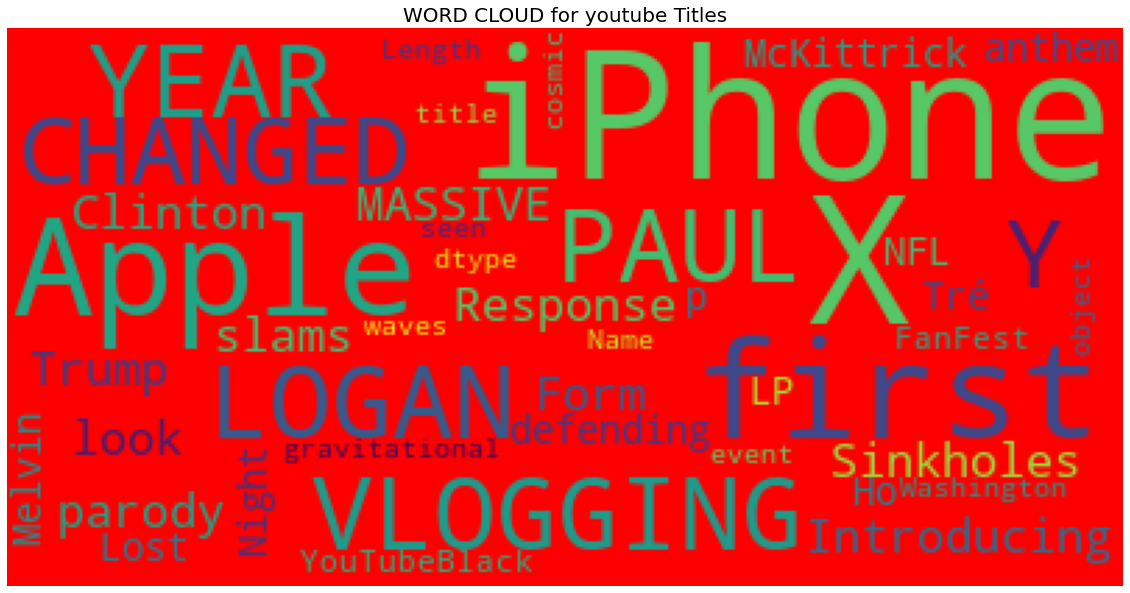

In [4]:
plt.figure(figsize = (20,20))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                      background_color = 'red',
                      stopwords=stopwords,
                      max_words = 4000,
                      max_font_size = 65,
                      random_state = 42
                    ).generate(str(df_youtube['title']))

#Plotting the word cloud
plt.imshow(wordcloud)
plt.title("WORD CLOUD for youtube Titles", fontsize = 20)
plt.axis('off')
plt.show()

# DATASET 2 - NETFLIX 

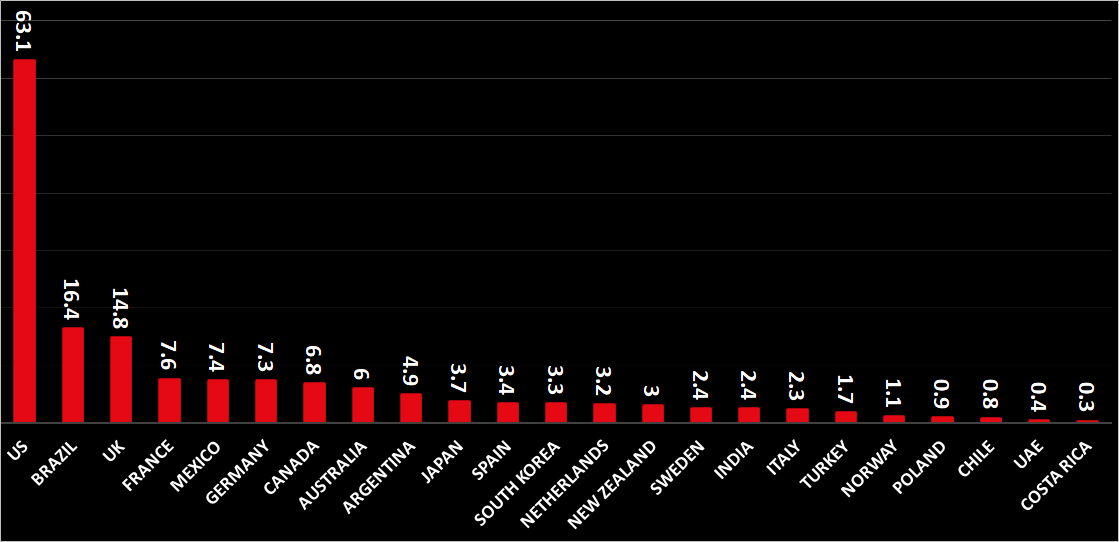

In [5]:
from IPython.display import Image
Image(filename='netflix.png') 

## Where did the data come from? 
###  Source: https://www.businessofapps.com/data/netflix-statistics/
### The site publishes country-by-country contribution data every year for netflix statistical analysis.

## Is the data quantitative, qualitative, categorical, etc? 
### The data is quantitative as it stores the count of each country

## How was the data processed before being displayed? 
### The data was processed by grouping the country values and then performing sum aggregation on each output count.

## What method was used to display that data? 
### The bar chart was created by Netflix internal Business intelligence tool

## Below I tried recreating the bar chart using pandas and seaborn

In [6]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns 

#loading the dataset
df_netflix = pd.read_csv("netflix_data.csv", encoding = "ISO-8859-1")

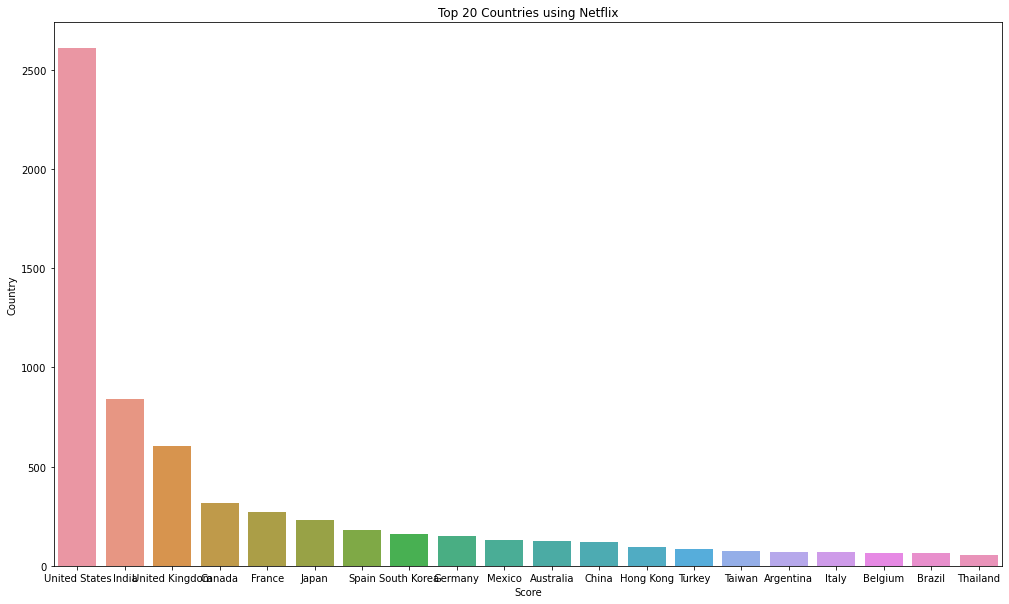

In [7]:
df_netflix.country.fillna("Country NA", inplace=True)
filtered_countries = df_netflix.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
filtered_countries = filtered_countries[filtered_countries != 'Country NA']
plt.figure(figsize=(17,10))
g = sns.countplot(x = filtered_countries, order=filtered_countries.value_counts().index[:20])
plt.title('Top 20 Countries using Netflix')
plt.xlabel('Score')
plt.ylabel('Country')
plt.show()

# Dataset 3 - Movie Genre

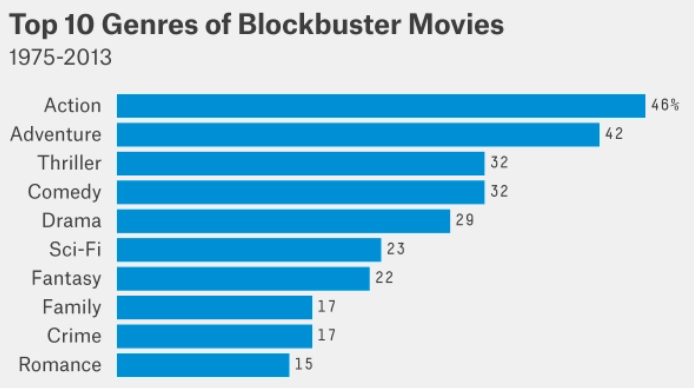

In [8]:
from IPython.display import Image
Image(filename='genre.png') 

## Where did the data come from? 
### Source: https://fivethirtyeight.com/features/the-11-defining-features-of-the-summer-blockbuster/

## Is the data quantitative, qualitative, categorical, etc? 
### The data was categorical, however it was preprocessed and transformed to quantitative data.

## How was the data processed before being displayed? 
### The data was processed by grouping the identical values and then performing sum aggregation on each output count.

## What method was used to display that data? 
### The barchart was published using AWS tool

In [9]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### I tried re-creating the visual using python and matplotlib library

In [10]:
movie_data = pd.read_csv('movie_data.csv')
movie_data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [11]:
movie_data['profit'] = movie_data['gross'] - movie_data['budget']
dt = movie_data[['genres','movie_title','language','title_year','imdb_score','duration','profit']]
s = dt['genres'].str.split('|').apply(Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'genres'
del dt['genres']
df = dt.join(s)
df1 = df[df['imdb_score']>=8]

In [12]:
df2 = (pd.DataFrame(df1.groupby('genres').movie_title.nunique())).sort_values('movie_title', ascending=False )

<AxesSubplot:title={'center':'Genres with >= 7 ratings'}, ylabel='genres'>

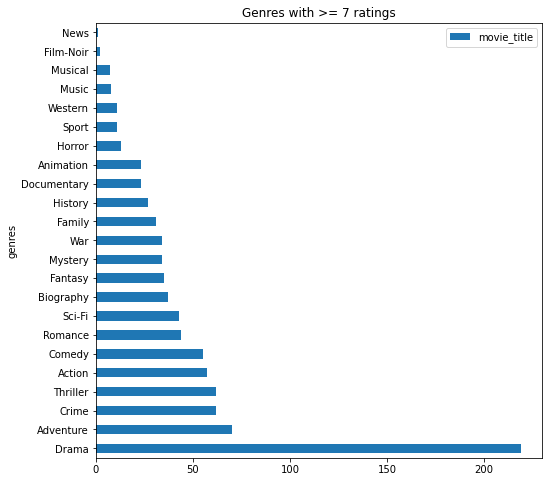

In [13]:
df2[['movie_title']].plot.barh(stacked=True, title = 'Genres with >= 7 ratings', figsize=(8, 8))